## logistic回归

### 前期数学基础

线性函数：
$\hat y = \sigma(W^Tx + b) $

sigmoid函数相关: 
$\sigma(z) = \frac{1}{1+e^{-z}} $

我们约定:
$ \hat y = P(y=1\mid x)$

如果 y=1 : $ P(y\mid x) = \hat y$

如果 y=0 : $ P(y\mid x) = 1 - \hat y$

合并整合上述公式
$ P(y\mid x) = \hat y^{y} (1-\hat y)^{1-y} $

log 函数严格单调递增， 左右两边取log，  备注 $\ell 为损失函数$

$ logP(y\mid x) = log\hat y^{y} (1-\hat y)^{1-y} = ylog\hat y + (1-y)log(1- \hat y) = -\ell (\hat y, y)$ 

原因是： 希望概率越大， 则损失函数越小

针对整个训练集: P(lables in training set) = $ \prod_{i=1}^{m}P(y^{i}\mid x^{i}) $

我们需要将其概率最大化

> 概念：最大似然值(maximum likehood estimation) , 即求出一组参数，使得整个公式取得最大值

左右取log

 log(P(lables in training set)) =  $ log(\prod_{i=1}^{m}P(y^{i}\mid x^{i})) = \sum_{i=1}^{m}log(P(y^i \mid x^i) = -\sum_{i=1}^{m}\ell (\hat y^{i}, y^{i}) $
 


成本函数:cost mimminze:

$ \jmath (w, b) = \frac{1}{m}\sum_{i=1}^{m} \ell (\hat y^{i}, y^{i}) $

$\frac {1}{m}$ 主要是为了对成本函数进行适当的缩放

### 损失函数相关

$ \ell (\hat y, y) = -ylog\hat{y} - (1-y)log(1-\hat{y}) $

我们的最终目的是使损失函数的值最小化

如果y = 1, $ \ell(\hat y, y) = -log\hat{y} $ 因此可知，为了损失最小， $\hat y$需要尽可能的大

如果y = 0, $ \ell(\hat y, y) = -log(1-\hat{y}) $ 因此可知， 为了损失最小， $\hat y$需要尽可能的大

### 成本函数相关

$ \jmath (w, b) = \frac{1}{m}\sum_{i=1}^{m} \ell (\hat y^{i}, y^{i}) = -\frac{1}{m}\sum_{i=1}^{m}(y^{i}log(\hat y^{i}) + (1-y^{i})log(1-\hat y^{i})) $

### 计算偏导 梯度

我们已经知道有以下公式成立

$$ z = w^{T} + b$$
$$ \hat y = a = \sigma(z) $$
$$ \ell (a, y) = -yloga - (1-y)log(1-a) $$

并且我们已知有以下推导链

$ z = w_{1}x + w_{2}x + ...+b \Longrightarrow \hat{y} = a = \sigma(z) \Longrightarrow \ell (a, y)  $

我们首先对a求导

$ da = \frac{d{\ell}}{da} = d(a,y) = d(-yloga - (1-y)log(1-a)) = -\frac{y}{a} + \frac{1-y}{1-a} $

下面我们对Z求导

$ dz = \frac{d{\ell}}{dz} = \frac{d{\ell}}{da} \cdot \frac{da}{dz} = da \cdot \frac{da}{dz} $


da我们刚才已经求出， 因此现在我们只需要求导 $\frac{da}{dz}$

$
\begin{align}
\frac{da}{dz} &= (\frac{1}{1+e^{-z}})^{'} \tag{1}\\
&= \frac{-(1+e^{-z})^{'}}{(1+e^{-z})^{2}} \tag{2}\\
&= \frac{e^{-z}}{(1+e^{-z})^{2}} \tag{3}\\
&= \frac{e^{-z}+1-1}{(1+e^{-z})^{2}} \tag{4}\\
&= \frac{1}{(1+e^{-z})} \cdot (1 - \frac{1}{(1+e^{-z})}) \tag{5}\\
&= a \cdot (1-a) \tag{6}\\
\end{align}
$

因此我们可以求出

$
\begin{align}
dz &= da \cdot \frac{da}{dz} \tag{1}\\
dz &= (-\frac{y}{a} + \frac{1-y}{1-a}) \cdot a \cdot (1-a) \tag{2}\\
dz &= a - y \tag{3}\\
\end{align}
$

最终我们求出 dw偏导

$
\begin{align}
dw &= \frac{dz}{dw} \cdot dz \tag{1}\\
dw &= x \cdot (a-y)
\end{align}
$

- 数学求导相关公式 http://math2.org/math/derivatives/identities.htm#quotient

### Logistic 回归梯度上升优化算法

In [157]:
from numpy import *
#加载数据和标签
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(intX):
    return 1.0/(1+exp(-intX))

def gradAscent(dataMatIn, classLables):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLables).transpose()
    m,n = shape(dataMatrix)
    #print(n)
    #初始化相关参数
    alpha = 0.001
    maxCycles = 500
    weights = ones([n, 1])
    for k in range(maxCycles):
        #a = dataMatrix * weights
#         print(dataMatrix.shape)
#         print(weights.shape)
        #print(a.shape)
        #dataMatrix 100*3, weights 3*1, h 100*1, error 100*1, weights 3*1
        
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()*error # 用之前推导的公式加深理解
    return weights


In [158]:
#获取数据集合
dataArr, labelMat = loadDataSet()

In [159]:
#dataArr
#labelMat
gradAscent(dataArr, labelMat)

(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)
(3, 1)
(100, 3)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 分析数据：画出决策边界

In [145]:
# def plotBestFit(weights):
#     import matplotlib.pyplot as plt
#     dataMat, labelMat = loadDataSet()
#     dataArr = array(dataMat)
#     n = shape(dataArr)[0]
#     xcord1 = []
#     ycord1 = []
#     xcord2 = []
#     ycord2 = []
#     for i in range(n):
#         if int(labelMat[i]) == 1:
#             xcord1.append(dataArr[i, 1])
#             ycord1.append(dataArr[i, 2])
#         else:
#             xcord2.append(dataArr[i, 1])
#             ycord2.append(dataArr[i, 2])
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
#     ax.scatter(xcord2, ycord2, s=30, c='green')
#     x = arange(-3.0, 3.0, 0.1)
#     #x = reshape(x, [x.shape[0], 1])
#     #print(x.shape)
#     y = (-weights[0] - weights[1]*x)/weights[2]
# #     x = reshape(x, [1, reshape(x, [x.shape[0], 1])])
#     print(x.shape)
#     print(y.shape)
#     ax.plot(x, y)
#     plt.xlabel('X1')
#     plt.ylabel('X2')
#     plt.show()
import numpy as np
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2] #这里的y 其实就是x2, 这块不好理解
    x = np.reshape(x, [60, 1])
    y = np.reshape(y, [60, 1])
    #print(x.shape)
    #print(y.shape)
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

In [146]:
weights = gradAscent(dataArr, labelMat)

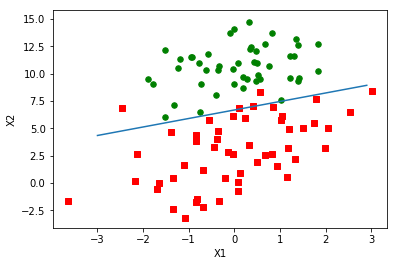

In [147]:
plotBestFit(weights)

### 随机梯度上升算法

In [117]:
def stocGradAscent0(dataMatrix, classLables):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]) * weights)
        error = classLables[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights


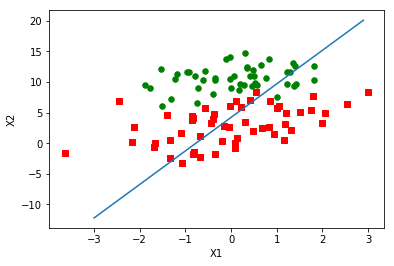

In [127]:
from numpy import *
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

### 改进的随即梯度上升算法

In [133]:
def stocGradScent(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

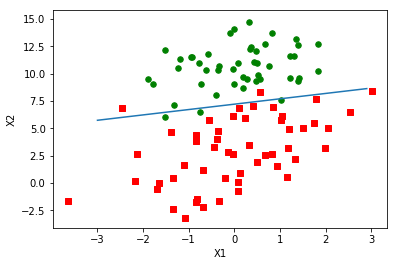

In [141]:
dataArr, labelMat = loadDataSet()
weights = stocGradScent(array(dataArr), labelMat)
plotBestFit(weights)